In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import lovely_tensors as lt

from einops import repeat, pack, unpack, rearrange
lt.monkey_patch()

In [12]:
# TextTransformer(nn.Module)
vocab_size = 1000
emb_size = 300
token_emb = nn.Embedding(vocab_size, emb_size)

batch_size = 32
sequence_length = 10
inp = torch.LongTensor(batch_size, sequence_length).random_(0, vocab_size)

token_emb(inp)

tensor[32, 10, 300] n=96000 x∈[-4.165, 4.330] μ=0.002 σ=0.998 grad EmbeddingBackward0

In [14]:
max_seq_len = 256
pos_emb = nn.Embedding(max_seq_len, emb_size)

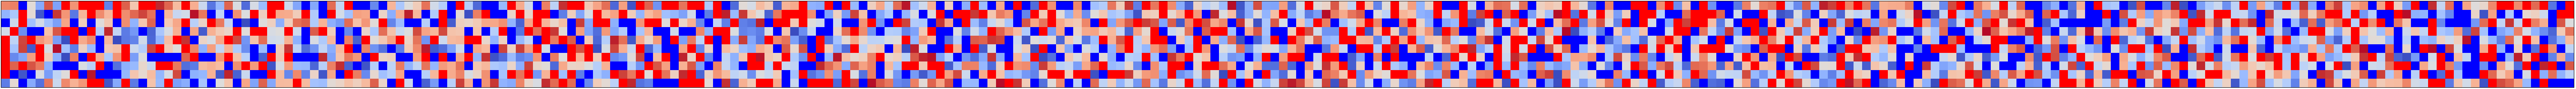

In [21]:
pos_emb(torch.arange(10)).chans(cmap='coolwarm', scale=20)

In [22]:
token_emb(inp) +  pos_emb(torch.arange(sequence_length))

tensor[32, 10, 300] n=96000 x∈[-6.314, 5.425] μ=0.011 σ=1.428 grad AddBackward0

In [23]:
clk_token = nn.Parameter(torch.randn(emb_size))

In [24]:
clk_token

Parameter containing:
Parameter[300] x∈[-2.536, 2.734] μ=-0.006 σ=1.049 grad

In [27]:
repeat(clk_token, 'd -> b d', b=batch_size)

tensor[32, 300] n=9600 x∈[-2.536, 2.734] μ=-0.006 σ=1.048 grad ReshapeAliasBackward0